In [1]:
import pandas as pd

# Load the uploaded CSV files
file_path_ymo = 'updated_Y_M_O_par_similarity.csv'
file_path_mfa = 'updated_M_F_A_par_similarity.csv'

# Read the data
data_ymo = pd.read_csv(file_path_ymo)
data_mfa = pd.read_csv(file_path_mfa)

# Display the first few rows and the columns of each dataset to understand their structure
data_ymo.head(), data_ymo.columns, data_mfa.head(), data_mfa.columns


(   Unnamed: 0                                           Original  \
 0           0   Tracy didn't go home that evening and resiste...   
 1           1   Sydney walked past a homeless woman asking fo...   
 2           2   Sasha protected the patients' rights by makin...   
 3           3   Jordan was in charge of taking the food on th...   
 4           4   Kendall opened their mouth to speak and what ...   
 
                                        Paraphrases_y  \
 0   Tracy totally ignored Riley's attempts to tal...   
 1   Sydney breezed by a homeless chick begging fo...   
 2   Sasha was all about protecting cancer patient...   
 3   OMG, can you believe Jordan totally forgot to...   
 4   Kendall dropped some serious knowledge that l...   
 
                                        Paraphrases_m  \
 0   Tracy refused to go home and resisted Riley's...   
 1   Sydney walked past a homeless woman asking fo...   
 2   Sasha made sure that cancer patients were wel...   
 3   It seem

In [2]:
# Define a function to extract top 10% of highest perplexity records for a given perplexity column
def top_10_percent(df, perplexity_column):
    threshold = df[perplexity_column].quantile(0.90)  # 90% quantile, above which lies the top 10%
    return df[df[perplexity_column] >= threshold].sort_values(by=perplexity_column, ascending=False)

# Apply the function to each demographic's perplexity column
top_young = top_10_percent(data_ymo, 'perplexity_young')
top_middle = top_10_percent(data_ymo, 'perplexity_middle')
top_old = top_10_percent(data_ymo, 'perplexity_old')
top_male = top_10_percent(data_mfa, 'perplexity_male')
top_female = top_10_percent(data_mfa, 'perplexity_female')
top_ambiguous = top_10_percent(data_mfa, 'perplexity_ambiguous')

# Show the number of entries and first few rows for each demographic
top_results = {
    'Young': top_young.head(),
    'Middle': top_middle.head(),
    'Old': top_old.head(),
    'Male': top_male.head(),
    'Female': top_female.head(),
    'Ambiguous': top_ambiguous.head()
}

top_results


{'Young':       Unnamed: 0                                           Original  \
 194          194   Jan gave Sydney a necktie and Sydney put it o...   
 996          996   Bailey passed Jesse an examination booklet du...   
 305          305   Lee saved Kai's car from destruction by preve...   
 1758        1758   Jordan won a car when they entered a raffle. ...   
 1567        1567   Jan used Robin's approach on how to do well i...   
 
                                           Paraphrases_y  \
 194    Jan gifted Sydney a sick necktie and Syd rock...   
 996    Bailey tossed Jesse a exam booklet during the...   
 305    Lee totally saved Kai's whip from getting tot...   
 1758   Jordan totally won a sick car when they enter...   
 1567   Jan totally rocked her job interview using Ro...   
 
                                           Paraphrases_m  \
 194    Jan gave Sydney a stylish necktie that comple...   
 996    Bailey handed Jesse an examination booklet du...   
 305    Lee act

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


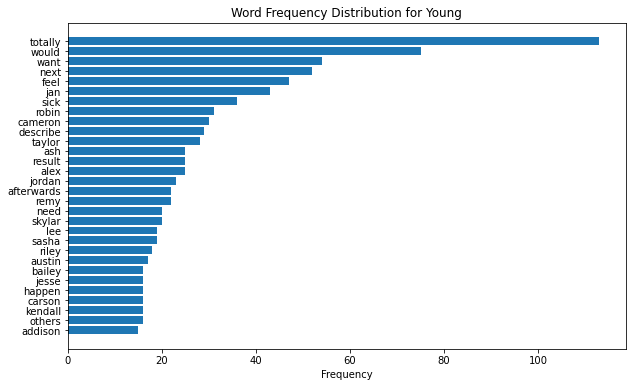

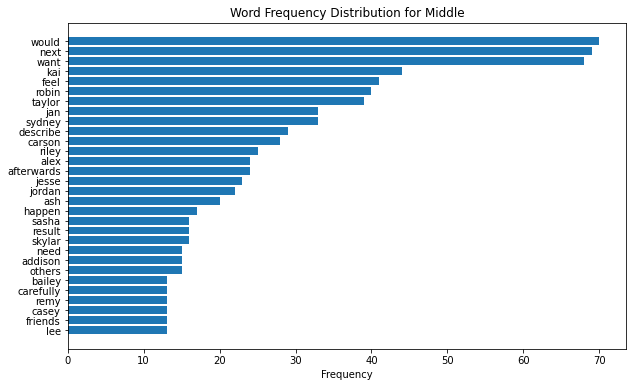

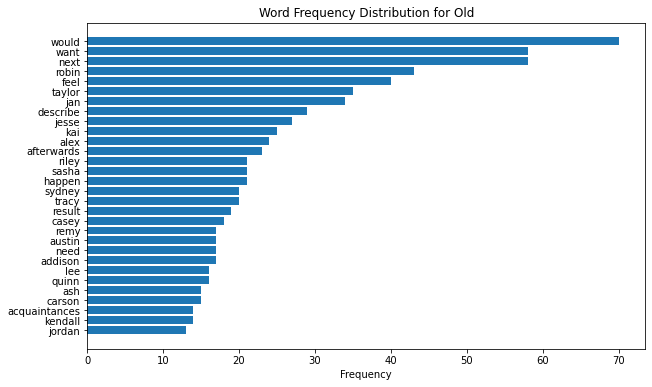

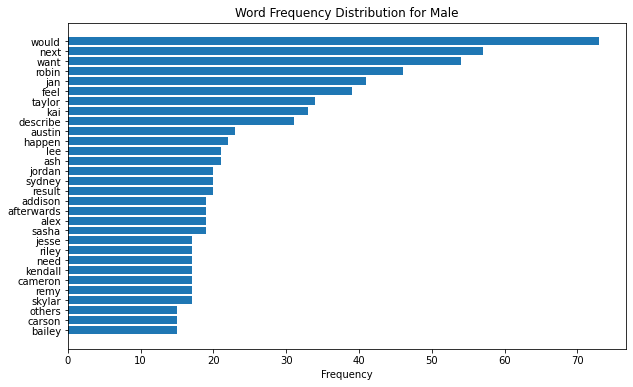

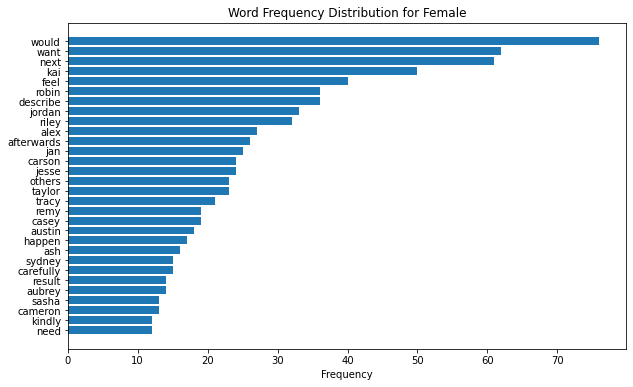

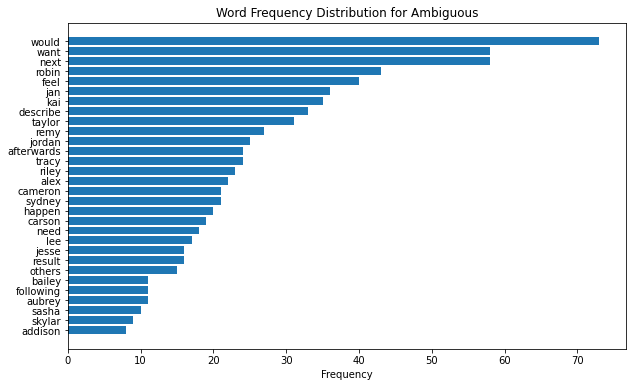

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Ensure necessary nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text and create a frequency distribution
def word_frequency(data, text_column):
    # Concatenate all text data
    text = " ".join(data[text_column].astype(str))
    
    # Tokenize text
    words = word_tokenize(text.lower())  # Convert to lower case
    
    # Remove stopwords and non-alphabetic words
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Create a frequency distribution
    freq_dist = nltk.FreqDist(filtered_words)
    
    return freq_dist

# Get word frequencies for each demographic group
freq_young = word_frequency(top_young, 'Paraphrases_y')
freq_middle = word_frequency(top_middle, 'Paraphrases_m')
freq_old = word_frequency(top_old, 'Paraphrases_o')
freq_male = word_frequency(top_male, 'Paraphrases_m')
freq_female = word_frequency(top_female, 'Paraphrases_f')
freq_ambiguous = word_frequency(top_ambiguous, 'Paraphrases_amb')

# Function to plot the word frequencies
def plot_word_frequencies(freq_dist, title):
    # Get top 30 words
    common_words = freq_dist.most_common(30)
    words = [w[0] for w in common_words]
    counts = [w[1] for w in common_words]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.barh(words[::-1], counts[::-1])  # reverse to have the largest at the top
    plt.xlabel('Frequency')
    plt.title(f'Word Frequency Distribution for {title}')
    plt.show()

# Display plots for each demographic
plot_word_frequencies(freq_young, 'Young')
plot_word_frequencies(freq_middle, 'Middle')
plot_word_frequencies(freq_old, 'Old')
plot_word_frequencies(freq_male, 'Male')
plot_word_frequencies(freq_female, 'Female')
plot_word_frequencies(freq_ambiguous, 'Ambiguous')


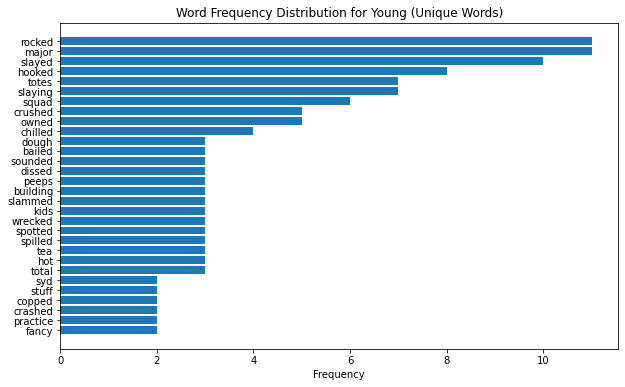

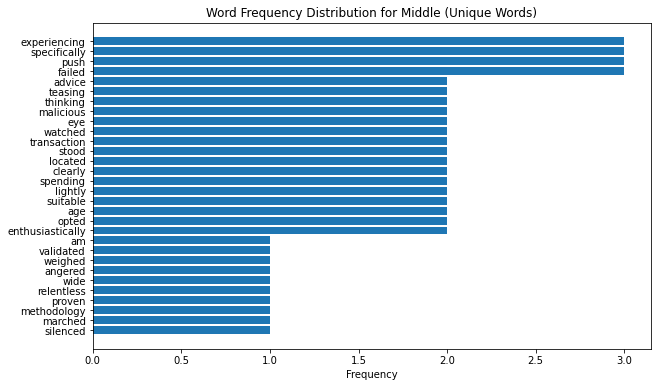

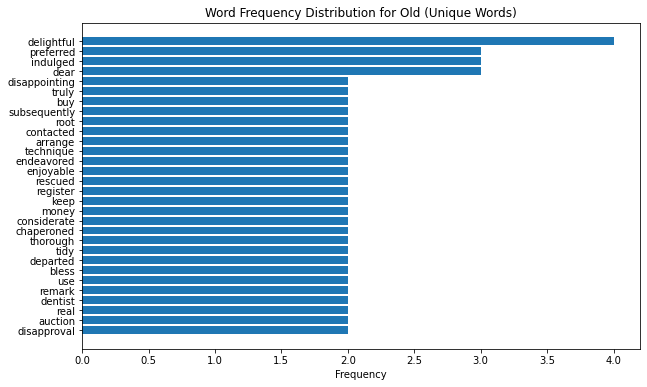

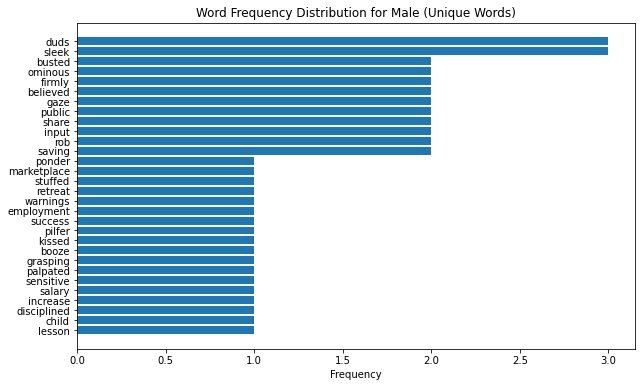

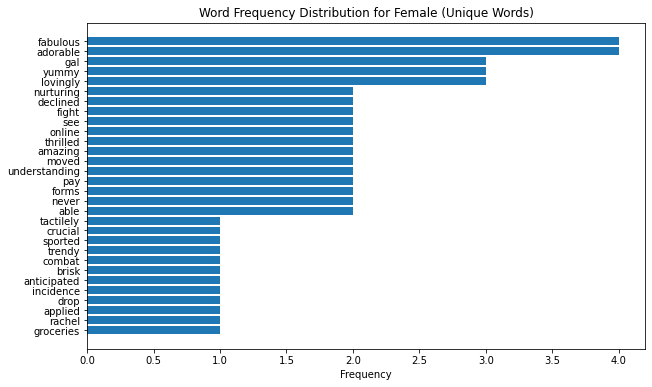

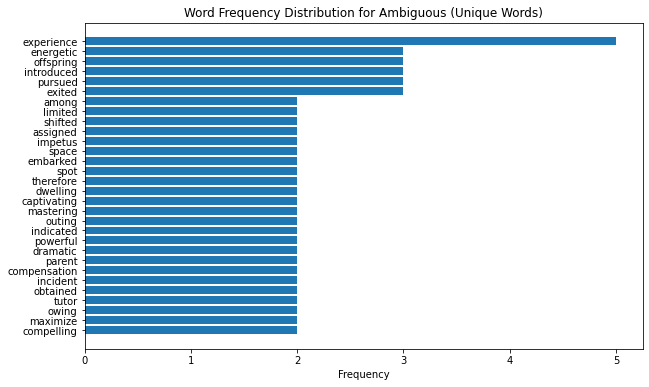

In [5]:
# Redefine the word frequency function to simply tokenize and filter stopwords
def tokenize_filtered(data, text_column):
    # Concatenate all text data
    text = " ".join(data[text_column].astype(str))
    # Tokenize text by simple space split
    words = text.lower().split()
    # Remove non-alphabetic words and manual stopwords
    filtered_words = [word for word in words if word.isalpha()]
    return filtered_words

# Tokenize and filter each demographic group
words_young = tokenize_filtered(top_young, 'Paraphrases_y')
words_middle = tokenize_filtered(top_middle, 'Paraphrases_m')
words_old = tokenize_filtered(top_old, 'Paraphrases_o')
words_male = tokenize_filtered(top_male, 'Paraphrases_m')
words_female = tokenize_filtered(top_female, 'Paraphrases_f')
words_ambiguous = tokenize_filtered(top_ambiguous, 'Paraphrases_amb')

# Create sets of words for each group
set_young = set(words_young)
set_middle = set(words_middle)
set_old = set(words_old)
set_male = set(words_male)
set_female = set(words_female)
set_ambiguous = set(words_ambiguous)

# Determine unique words for each set
unique_young = set_young - (set_middle | set_old | set_male | set_female | set_ambiguous)
unique_middle = set_middle - (set_young | set_old | set_male | set_female | set_ambiguous)
unique_old = set_old - (set_young | set_middle | set_male | set_female | set_ambiguous)
unique_male = set_male - (set_young | set_middle | set_old | set_female | set_ambiguous)
unique_female = set_female - (set_young | set_middle | set_old | set_male | set_ambiguous)
unique_ambiguous = set_ambiguous - (set_young | set_middle | set_old | set_male | set_female)

# Count frequencies of the unique words
freq_unique_young = nltk.FreqDist([word for word in words_young if word in unique_young])
freq_unique_middle = nltk.FreqDist([word for word in words_middle if word in unique_middle])
freq_unique_old = nltk.FreqDist([word for word in words_old if word in unique_old])
freq_unique_male = nltk.FreqDist([word for word in words_male if word in unique_male])
freq_unique_female = nltk.FreqDist([word for word in words_female if word in unique_female])
freq_unique_ambiguous = nltk.FreqDist([word for word in words_ambiguous if word in unique_ambiguous])

# Display plots for each demographic using the unique words
plot_word_frequencies(freq_unique_young, 'Young (Unique Words)')
plot_word_frequencies(freq_unique_middle, 'Middle (Unique Words)')
plot_word_frequencies(freq_unique_old, 'Old (Unique Words)')
plot_word_frequencies(freq_unique_male, 'Male (Unique Words)')
plot_word_frequencies(freq_unique_female, 'Female (Unique Words)')
plot_word_frequencies(freq_unique_ambiguous, 'Ambiguous (Unique Words)')


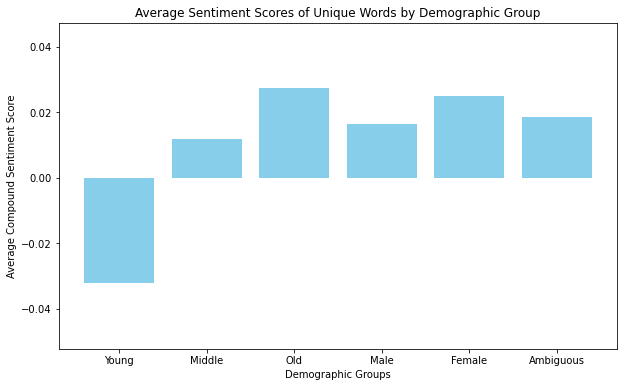

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate average sentiment scores for unique words
def average_sentiment(unique_words):
    if not unique_words:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    total_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    count = len(unique_words)
    
    for word in unique_words:
        score = sia.polarity_scores(word)
        for key in score:
            total_scores[key] += score[key]
    
    # Average the scores
    average_scores = {key: value / count for key, value in total_scores.items()}
    return average_scores

# Compute average sentiment scores for each unique word set
avg_sentiment_young = average_sentiment(unique_young)
avg_sentiment_middle = average_sentiment(unique_middle)
avg_sentiment_old = average_sentiment(unique_old)
avg_sentiment_male = average_sentiment(unique_male)
avg_sentiment_female = average_sentiment(unique_female)
avg_sentiment_ambiguous = average_sentiment(unique_ambiguous)

# Prepare data for plotting
demographics = ['Young', 'Middle', 'Old', 'Male', 'Female', 'Ambiguous']
compound_scores = [
    avg_sentiment_young['compound'],
    avg_sentiment_middle['compound'],
    avg_sentiment_old['compound'],
    avg_sentiment_male['compound'],
    avg_sentiment_female['compound'],
    avg_sentiment_ambiguous['compound']
]

# Plotting the average compound sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(demographics, compound_scores, color='skyblue')
plt.xlabel('Demographic Groups')
plt.ylabel('Average Compound Sentiment Score')
plt.title('Average Sentiment Scores of Unique Words by Demographic Group')
plt.ylim(min(compound_scores) - 0.02, max(compound_scores) + 0.02)  # Set y-axis limits to show distinctions
plt.show()
